In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sqlalchemy import create_engine
import psycopg2
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

sns.set_palette('spring')

In [126]:
schools = pd.read_csv()
list(employer.columns)

In [110]:
employer.to_csv('Datasets/College_Employers.csv')
employer.dtypes

institution                   object
publicflag                     int64
postsecondaryflag              int64
yearsofcollegerequired       float64
inststatus                    object
postsecondaryprimary           int64
activeflag                     int64
titleiveligible                int64
admissionsmen                float64
admissionswomen              float64
admissionstotal              float64
applicantsmen                float64
applicantswomen              float64
applicantstotal              float64
enrolledmen                  float64
enrolledwomen                float64
enrolledtotal                float64
retentionrate_fulltime       float64
retentionrate_parttime       float64
studenttofacultyratio        float64
associatesflag               float64
bachelorsflag                float64
mastersflag                  float64
phdresearchflag              float64
phdproflag                   float64
sat25thperreading            float64
sat75thperreading            float64
s

In [111]:
employer['row_num'] = employer.groupby(['institution']).cumcount()+1
employer = employer[employer['row_num']==1]
employer.drop('row_num',axis=1,inplace=True)

In [112]:
numcols = list(employer.select_dtypes(['float64']))
norm_employer = employer.copy()
for column in numcols:
    norm_employer[column] = norm_employer[column] / norm_employer[column].abs().max()

In [115]:
norm_employer.head()

,institution,publicflag,postsecondaryflag,yearsofcollegerequired,inststatus,postsecondaryprimary,activeflag,titleiveligible,admissionsmen,admissionswomen,...,sat75thpermath,act25thpercomp,act75thpercomp,act25thpereng,act75thpereng,act25thpermath,act75thpermath,predominantdemo_bachelors,predominantdemo_masters,predominantdemo_phd
0,A Better U Beauty Barber Academy,1,1,-0.250,N,1,1,1,0.016397,-0.00897,...,0.82625,0.628571,0.611111,0.657143,0.75,0.628571,0.666667,White,Asian,White
1,A T Still University of Health Sciences,1,1,0.375,A,1,1,1,0.016397,-0.00897,...,0.82625,0.628571,0.611111,0.657143,0.75,0.628571,0.666667,White,White,White
2,Aaniiih Nakoda College,1,1,0.250,A,1,1,1,0.016397,-0.00897,...,0.82625,0.628571,0.611111,0.657143,0.75,0.628571,0.666667,White,Asian,White
3,ABC Adult School,1,1,-0.250,A,1,1,1,0.016397,-0.00897,...,0.82625,0.628571,0.611111,0.657143,0.75,0.628571,0.666667,White,Asian,White
4,ABC Beauty Academy,1,1,-0.250,A,1,1,1,0.016397,-0.00897,...,0.82625,0.628571,0.611111,0.657143,0.75,0.628571,0.666667,White,Asian,White


## Hello World

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

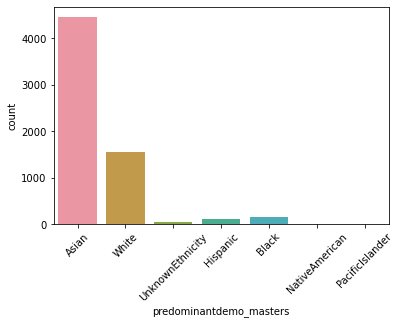

In [114]:
fig,ax = plt.subplots()

cnt = sns.countplot(x = employer['predominantdemo_masters'])
plt.xticks(rotation=45,x=0)